In [1]:
import os
import random
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tifffile import imread

np.set_printoptions(precision = 2)
np.set_printoptions(suppress  = True)

In [2]:
def normalize(img):
    img_cop  = img.copy()
    img_cop  = img_cop.astype('float64') 
    img_min  = np.min(img_cop)
    img_max  = np.max(img_cop)
    img_cop  = (img_cop - img_min)/(img_max - img_min)
    return img_cop

In [3]:
model = tf.keras.models.load_model('model segmentation')
img   = imread('data/multi_recorte_2.tif')

In [4]:
img_height    = 256
img_width     = 256
img_channels  = 3

# Parameters
Nx, Ny, Nz = img.shape
Nw   = 256
step = round(Nw/5)

# Cut images
indx_x = np.unique(np.concatenate(([np.arange(0, Nx-Nw, step)], [np.array([Nx-Nw])]), axis = 1))
indx_y = np.unique(np.concatenate(([np.arange(0, Ny-Nw, step)], [np.array([Ny-Nw])]), axis = 1))

cntr = 0
bufr_1 = np.zeros((Nx, Ny, Nz))
bufr_2 = np.zeros((Nx, Ny, Nz))
for i in indx_x:
    for j in indx_y:
        i_idx = np.arange(i, i+Nw)
        j_idx = np.arange(j, j+Nw)
        tmp = img[i_idx[:, None], j_idx[None, :], :]
        block = np.around(255*normalize(tmp)).astype('uint8')
        predi = model.predict(np.expand_dims(block, axis = 0), verbose=0)
        bufr_1[i_idx[:, None], j_idx[None, :], :] = bufr_1[i_idx[:, None], j_idx[None, :], :] + predi;
        bufr_2[i_idx[:, None], j_idx[None, :], :] = bufr_2[i_idx[:, None], j_idx[None, :], :] + 1;

all_preditions = np.around(255*normalize(bufr_1/bufr_2)).astype('uint8')

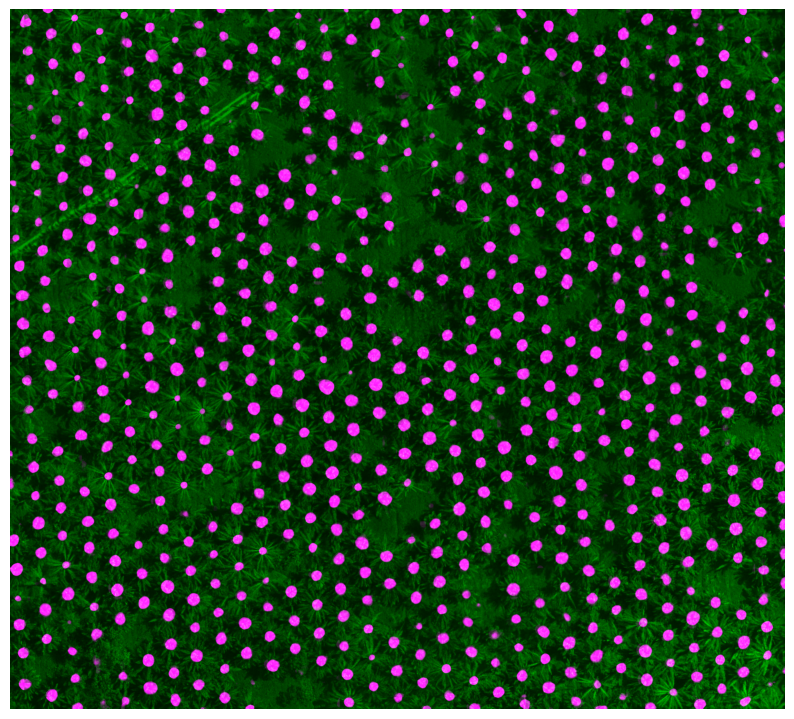

In [5]:
img1     = all_preditions[:,:,0]
img2     = img[:,:,0]
img_all  = np.dstack((img1,img2,img1))

fig, axs = plt.subplots(figsize = (10,10))
axs.imshow(img_all)
axs.axis('off')
plt.show()